<a href="https://colab.research.google.com/github/ZIWEISHEN/Oracle/blob/main/Data_Processing_Airbnb_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Package 

In [339]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [340]:
# general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade pip
!pip install -U sklearn
!pip install imblearn
!pip install textblob
!pip install -U imbalanced-learn
!pip install xgboost
!pip install -U seaborn

## Preprocessing data

In [341]:
raw_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/listings.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 37012 Airbnb listings


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210204180331,2021-02-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,93%,26%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75362,-73.98377,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",$100.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,30,60,90,365,2021-02-05,48,0,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,f,2,2,0,0,0.35
1,3831,https://www.airbnb.com/rooms/3831,20210204180331,2021-02-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a few hours,98%,93%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Clinton Hill,Brooklyn,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",$73.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,6,27,55,249,2021-02-05,386,80,3,2014-09-30,2021-01-27,90.0,10.0,9.0,9.0,10.0,10.0,10.0,NaN,f,1,1,0,0,4.99
2,5121,https://www.airbnb.com/rooms/5121,20210204180331,2021-02-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room in apartment,Private room,2,NaN,NaN,1.0,1.0,"[""Wifi"", ""Heating"", ""Air conditioning"", ""Long ...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,2021-02-0

### Droping initial columns

In [342]:
raw_df.columns
raw_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

In [343]:
cols_to_drop = ['listing_url', 'picture_url','scrape_id','last_scraped', 'name', 'description', 'description', \
                'neighborhood_overview', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', \
                'host_thumbnail_url','host_picture_url', 'host_neighbourhood', 'host_verifications', \
                'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)

Columns with several NULL entries are dropped too.

In [344]:
df.isna().sum()

id                                                  0
host_since                                         18
host_response_time                              18507
host_response_rate                              18507
host_acceptance_rate                            14633
host_is_superhost                                  18
host_listings_count                                18
host_total_listings_count                          18
host_has_profile_pic                               18
host_identity_verified                             18
neighbourhood                                   13683
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                   

In [345]:
df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed'], axis=1, inplace=True)

df.set_index('id', inplace=True) # ID as index

In [346]:
df

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,2008-09-09,within a few hours,93%,f,6.0,6.0,t,t,"New York, United States",Midtown,40.75362,-73.98377,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",$100.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,30,60,90,365,48,0,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,f,2,2,0,0,0.35
3831,2008-12-07,within a few hours,98%,f,1.0,1.0,t,t,"Brooklyn, New York, United States",Clinton Hill,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",$73.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,6,27,55,249,386,80,3,2014-09-30,2021-01-27,90.0,10.0,9.0,9.0,10.0,10.0,10.0,NaN,f,1,1,0,0,4.99
5121,2009-02-03,NaN,NaN,f,1.0,1.0,t,t,NaN,Bedford-Stuyvesant,40.68688,-73.95596,Private room in apartment,Private room,2,NaN,NaN,1.0,1.0,"[""Wifi"", ""Heating"", ""Air conditioning"", ""Long ...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,50,0,0,2009-05-28,2019-12-02,90.0,8.0,8.0,10.0,10.0,9.0,9.0,NaN,f,1,0,1,0,0.35
5178,2009-03-03,within a day,100%,f,1.0,1.0,t,f,"New York, United States",Midtown,40.76468,-73.98315,Private room in apartment,Private room,2,NaN,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Hair dryer"", ""...",$79.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,NaN,t,29,59,86,343,474,10,0,2009-05-06,2020-09-25,84.0,9.0,8.0,9.0,9.0,10.0,9.0,NaN,f,1,0,1,0,3.31
5203,2009-02-05,NaN,NaN,f,1.0,1.0,t,t,"New York, United States",Upper West Side,40.80178,-73.96723,Private room in apartment,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Hair dryer"", ""Breakfast"", ""Smoke alarm"", ""Es...",$75.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,NaN,t,0,0,0,0,118,0,0,2009-09-07,2017-07-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,0,1,0,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48033101,2019-03-27,within an hour,100%,f,2.0,2.0,t,t,NaN,Woodside,40.74415,-73.90941,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Hair dryer"", ""Smoke alarm"", ""Essentials"", ""T...",$90.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,2,2,0,0,NaN
48033611,2019-08-21,NaN,NaN,f,1.0,1.0,t,t,NaN,Norwood,40.87575,-73.88399,Private room in apartment,Private room,1,NaN,1 shared bath,1.0,0.0,"[""Refrigerator"", ""Single level home"", ""Microwa...",$520.00,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,15,45,72,292,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
48038944,2019-10-29,within an hour,100%,f,1.0,1.0,t,t,"New York, United States",Midtown,40.75774,-73.96173,Private room in apartment,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Refrigerator"", ""Microwave"", ""Dining table"", ...",$6

host_listings_count and host_total_listings_count are the same in all. These cases are those where the value is NaN. Therefore one of these columns can be dropped. 
Other columns which split these into type of property will also be dropped, as they will be highly correlated (one will be the total of the others).

In [347]:
print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:5]

18


,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1673338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Brooklyn, New York, United States",Williamsburg,40.71346,-73.93883,Private room in apartment,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Breakfast"", ""Refrigerator"", ""Single level ho...",$78.00,1,21,1.0,2.0,21.0,21.0,1.4,21.0,NaN,t,7,37,67,67,26,0,0,2013-10-13,2020-01-09,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,0,1,0,0.29
2835711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"New York, United States",Greenwich Village,40.73083,-74.00060,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Oven"", ""Hair dryer"", ""Stove"", ""Smoke alarm"",...",$155.00,30,200,30.0,30.0,200.0,200.0,30.0,200.0,NaN,t,0,0,0,201,46,2,0,2014-05-05,2021-01-04,89.0,9.0,7.0,10.0,10.0,10.0,9.0,NaN,f,1,1,0,0,0.56
4446862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Brooklyn, New York, United States",Crown Heights,40.67512,-73.96146,Private room in apartment,Private room,2,NaN,1 bath,1.0,1.0,"[""Smoke alarm"", ""Essentials"", ""TV"", ""Wifi"", ""H...",$50.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4763327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Brooklyn, New York, United States",Greenpoint,40.72035,-73.95355,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Hot tub"", ""Smoke alarm"", ""Essentials"", ""Gym""...",$195.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,0,0,1,0,0,2015-10-20,2015-10-20,80.0,8.0,10.0,10.0,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
6360224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bushwick,40.70146,-73.92792,Private room in apartment,Private room,1,NaN,0 baths,1.0,1.0,"[""First aid kit"", ""Smoke alarm"", ""Essentials"",...",$37.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,0,0,1,0,0,2015-07-01,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,0.01


In [348]:
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 
         'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
         'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)
df

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,2008-09-09,within a few hours,93%,f,6.0,t,t,"New York, United States",Midtown,40.75362,-73.98377,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",$100.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,30,60,90,365,48,0,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,f,0.35
3831,2008-12-07,within a few hours,98%,f,1.0,t,t,"Brooklyn, New York, United States",Clinton Hill,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",$73.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,6,27,55,249,386,80,3,2014-09-30,2021-01-27,90.0,10.0,9.0,9.0,10.0,10.0,10.0,NaN,f,4.99
5121,2009-02-03,NaN,NaN,f,1.0,t,t,NaN,Bedford-Stuyvesant,40.68688,-73.95596,Private room in apartment,Private room,2,NaN,NaN,1.0,1.0,"[""Wifi"", ""Heating"", ""Air conditioning"", ""Long ...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,50,0,0,2009-05-28,2019-12-02,90.0,8.0,8.0,10.0,10.0,9.0,9.0,NaN,f,0.35
5178,2009-03-03,within a day,100%,f,1.0,t,f,"New York, United States",Midtown,40.76468,-73.98315,Private room in apartment,Private room,2,NaN,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Hair dryer"", ""...",$79.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,NaN,t,29,59,86,343,474,10,0,2009-05-06,2020-09-25,84.0,9.0,8.0,9.0,9.0,10.0,9.0,NaN,f,3.31
5203,2009-02-05,NaN,NaN,f,1.0,t,t,"New York, United States",Upper West Side,40.80178,-73.96723,Private room in apartment,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Hair dryer"", ""Breakfast"", ""Smoke alarm"", ""Es...",$75.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,NaN,t,0,0,0,0,118,0,0,2009-09-07,2017-07-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48033101,2019-03-27,within an hour,100%,f,2.0,t,t,NaN,Woodside,40.74415,-73.90941,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Hair dryer"", ""Smoke alarm"", ""Essentials"", ""T...",$90.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
48033611,2019-08-21,NaN,NaN,f,1.0,t,t,NaN,Norwood,40.87575,-73.88399,Private room in apartment,Private room,1,NaN,1 shared bath,1.0,0.0,"[""Refrigerator"", ""Single level home"", ""Microwa...",$520.00,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,15,45,72,292,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
48038944,2019-10-29,within an hour,100%,f,1.0,t,t,"New York, United States",Midtown,40.75774,-73.96173,Private room in apartment,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Refrigerator"", ""Microwave"", ""Dining table"", ...",$63.00,30,90,30.0,30.0,90.0,90.0,30.0,90.0,NaN,t,1,1,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN


We can see that there are several columns for minimum and maximum nights stay, we can just keep the min and the max.

In [349]:
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
         'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [350]:
df

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,2008-09-09,within a few hours,93%,f,6.0,t,t,"New York, United States",Midtown,40.75362,-73.98377,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",$100.00,30,1125,NaN,t,30,60,90,365,48,0,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,f,0.35
3831,2008-12-07,within a few hours,98%,f,1.0,t,t,"Brooklyn, New York, United States",Clinton Hill,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",$73.00,1,730,NaN,t,6,27,55,249,386,80,3,2014-09-30,2021-01-27,90.0,10.0,9.0,9.0,10.0,10.0,10.0,NaN,f,4.99
5121,2009-02-03,NaN,NaN,f,1.0,t,t,NaN,Bedford-Stuyvesant,40.68688,-73.95596,Private room in apartment,Private room,2,NaN,NaN,1.0,1.0,"[""Wifi"", ""Heating"", ""Air conditioning"", ""Long ...",$60.00,30,730,NaN,t,30,60,90,365,50,0,0,2009-05-28,2019-12-02,90.0,8.0,8.0,10.0,10.0,9.0,9.0,NaN,f,0.35
5178,2009-03-03,within a day,100%,f,1.0,t,f,"New York, United States",Midtown,40.76468,-73.98315,Private room in apartment,Private room,2,NaN,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Hair dryer"", ""...",$79.00,2,14,NaN,t,29,59,86,343,474,10,0,2009-05-06,2020-09-25,84.0,9.0,8.0,9.0,9.0,10.0,9.0,NaN,f,3.31
5203,2009-02-05,NaN,NaN,f,1.0,t,t,"New York, United States",Upper West Side,40.80178,-73.96723,Private room in apartment,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Hair dryer"", ""Breakfast"", ""Smoke alarm"", ""Es...",$75.00,2,14,NaN,t,0,0,0,0,118,0,0,2009-09-07,2017-07-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48033101,2019-03-27,within an hour,100%,f,2.0,t,t,NaN,Woodside,40.74415,-73.90941,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Hair dryer"", ""Smoke alarm"", ""Essentials"", ""T...",$90.00,3,1125,NaN,t,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN
48033611,2019-08-21,NaN,NaN,f,1.0,t,t,NaN,Norwood,40.87575,-73.88399,Private room in apartment,Private room,1,NaN,1 shared bath,1.0,0.0,"[""Refrigerator"", ""Single level home"", ""Microwa...",$520.00,1,365,NaN,t,15,45,72,292,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
48038944,2019-10-29,within an hour,100%,f,1.0,t,t,"New York, United States",Midtown,40.75774,-73.96173,Private room in apartment,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Refrigerator"", ""Microwave"", ""Dining table"", ...",$63.00,30,90,NaN,t,1,1,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN


Checking whether worth including

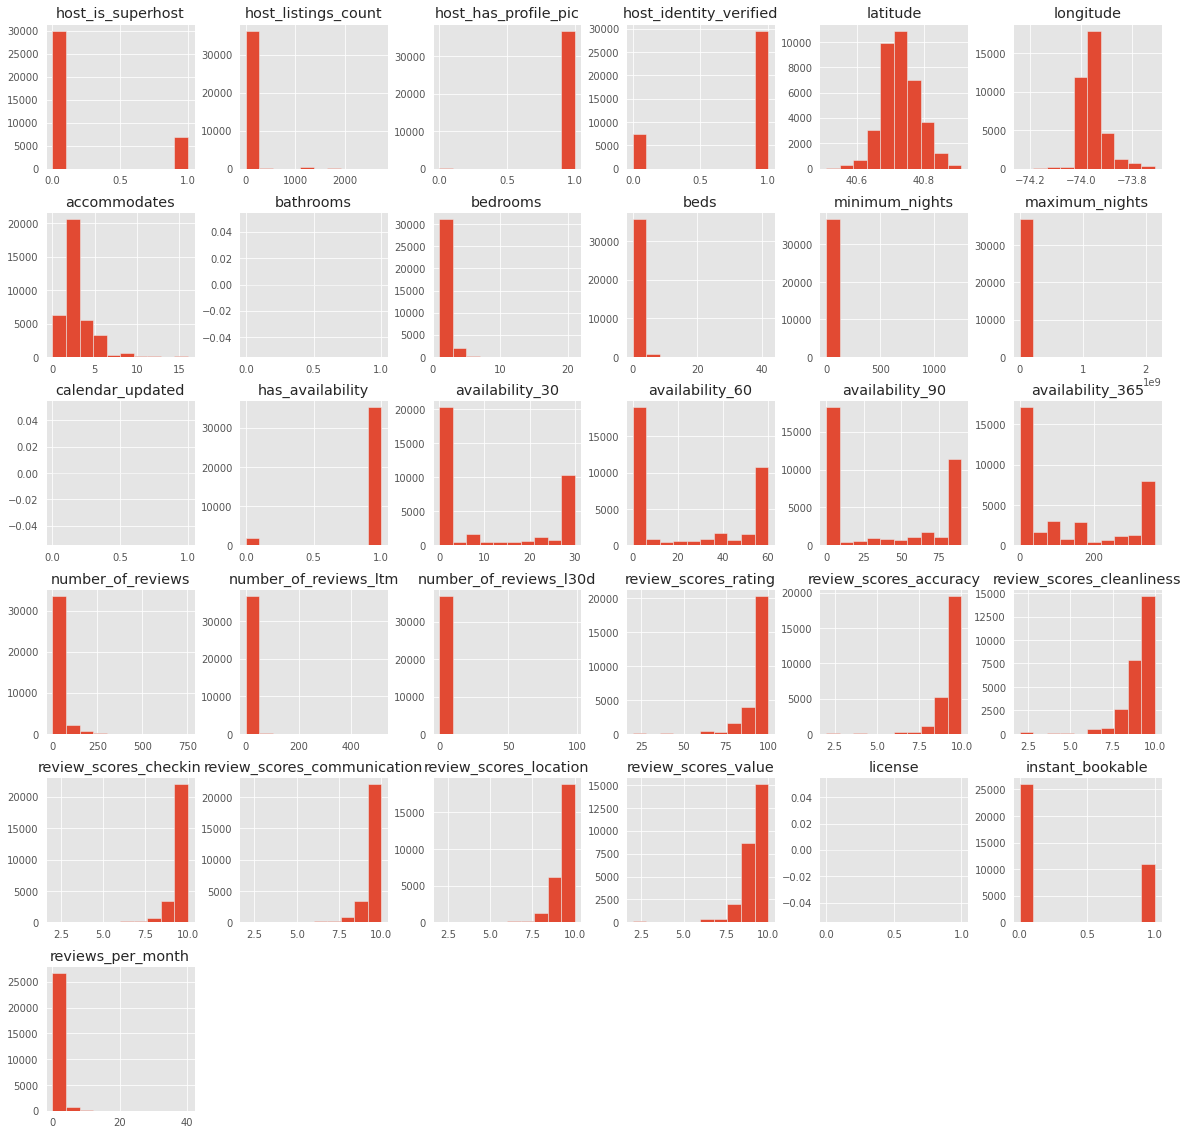

In [351]:
import seaborn as sns
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

In [352]:
df.drop(['has_availability', 'host_has_profile_pic','calendar_updated','license','bathrooms'], axis=1, inplace=True)

In [353]:
df.head()

,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,2008-09-09,within a few hours,93%,0.0,6.0,1.0,"New York, United States",Midtown,40.75362,-73.98377,Entire apartment,Entire home/apt,2,1 bath,NaN,1.0,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",$100.00,30,1125,30,60,90,365,48,0,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0,0.35
3831,2008-12-07,within a few hours,98%,0.0,1.0,1.0,"Brooklyn, New York, United States",Clinton Hill,40.68514,-73.95976,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",$73.00,1,730,6,27,55,249,386,80,3,2014-09-30,2021-01-27,90.0,10.0,9.0,9.0,10.0,10.0,10.0,0,4.99
5121,2009-02-03,NaN,NaN,0.0,1.0,1.0,NaN,Bedford-Stuyvesant,40.68688,-73.95596,Private room in apartment,Private room,2,NaN,1.0,1.0,"[""Wifi"", ""Heating"", ""Air conditioning"", ""Long ...",$60.00,30,730,30,60,90,365,50,0,0,2009-05-28,2019-12-02,90.0,8.0,8.0,10.0,10.0,9.0,9.0,0,0.35
5178,2009-03-03,within a day,100%,0.0,1.0,0.0,"New York, United States",Midtown,40.76468,-73.98315,Private room in apartment,Private room,2,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Hair dryer"", ""...",$79.00,2,14,29,59,86,343,474,10,0,2009-05-06,2020-09-25,84.0,9.0,8.0,9.0,9.0,10.0,9.0,0,3.31
5203,2009-02-05,NaN,NaN,0.0,1.0,1.0,"New York, United States",Upper West Side,40.80178,-73.96723,Private room in apartment,Private room,1,1 shared bath,1.0,1.0,"[""Hair dryer"", ""Breakfast"", ""Smoke alarm"", ""Es...",$75.00,2,14,0,0,0,0,118,0,0,2009-09-07,2017-07-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.85


## Deeper cleansing
### 1. host_since
This is a datetime column, and will be converted into a measure of the number of days that a host has been on the platform, measured from the date that the data was scraped (APR 24, 2021). The original column will be left in initially for EDA, and dropped later.

In [354]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (pd.datetime(2021, 4, 24) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 2025.0
Median days as host: 2088.0


### 2. host_response_time
For there are over 50% data missing from the response time, we should consider that filling the unknown would do no much effort to the process. So we consider drop the coulumn. 

In [355]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

Null values: 18507
Proportion: 50.0%


In [356]:
df.host_response_time.value_counts(normalize=True)

within an hour        0.548122
within a few hours    0.212753
within a day          0.164226
a few days or more    0.074899
Name: host_response_time, dtype: float64

In [357]:
df.drop(['host_response_time'],axis=1, inplace=True)

### 3. host_response_rate



In [358]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")
print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Null values: 18507
Proportion: 50.0%
Mean host response rate: 89.0
Median host response rate: 100.0
Proportion of 100% host response rates: 64.1%


In [359]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

unknown    18507
100%       11869
50-89%      3069
90-99%      1874
0-49%       1693
Name: host_response_rate, dtype: int64

### 4.host_is_superhost

In [360]:
print("Null values:", df.host_is_superhost.isna().sum())

Null values: 18


In [361]:
df.dropna(subset=['host_is_superhost'], inplace=True)
df.host_is_superhost.sum()

6971.0

### 5. Property_type
For the major type of the rooms, we can catergorized them with 'house', 'apartment' and 'condominium' and 'other'

In [362]:
df.property_type.value_counts()

Entire apartment                      15501
Private room in apartment             12027
Private room in house                  1897
Private room in townhouse              1044
Entire condominium                      983
Entire house                            949
Entire loft                             628
Entire townhouse                        588
Shared room in apartment                501
Private room in condominium             476
Room in hotel                           371
Private room in loft                    351
Room in boutique hotel                  336
Entire serviced apartment               301
Entire guest suite                      231
Private room in guest suite             103
Shared room in house                     80
Private room in hostel                   52
Room in aparthotel                       51
Entire guesthouse                        45
Room in serviced apartment               43
Private room in serviced apartment       38
Shared room in loft             

In [363]:
df.property_type.replace({
    'Private room in apartment': 'Apartment',
    'Entire apartment': 'Apartment',
    'Entire loft': 'Apartment',
    'Shared room in apartment': 'Apartment',
    'Entire serviced apartment': 'Apartment',
    'Shared room in apartment': 'Apartment',
    'Room in hotel': 'Apartment',
    'Room in boutique hotel': 'Apartment',
    'Private room in loft': 'Apartment',
    'Private room in house': 'House',
    'Private room in townhouse': 'House',
    'Entire townhouse': 'House',
    'Chalet': 'House',  
    'Entire condominium': 'Condominium',
    'Private room in condominium': 'Condominium' ,
    'Shared room in house': 'house',  
    }, inplace=True)

In [364]:
# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment','Condominium']), 'property_type'] = 'Other'

### Bathrooms Bedrooms and Beds

In [365]:
df.bathrooms_text.value_counts()
#First we would change the str values whose intial is not numbers into numbers 
df.bathrooms_text.replace({
    'Half-bath': '0.5',
    'Shared half-bath': '0.5',
    'Private half-bath': '0.5',
    }, inplace=True)

In [366]:
df.bathrooms_text = df.bathrooms_text.str[0:2]
df.bathrooms_text = df.bathrooms_text.str.replace('.','.5')
df.dropna(subset=['bathrooms_text'], inplace=True)
df.bathrooms_text = df.bathrooms_text.astype('float64')
df.bedrooms = df.bedrooms.astype('float64')
df.beds = df.beds.astype('float64')
for col in ['bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)
df

,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days_active
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,2008-09-09,90-99%,0.0,6.0,1.0,"New York, United States",Midtown,40.75362,-73.98377,Apartment,Entire home/apt,2,1.0,1.0,1.0,"[""Refrigerator"", ""Air conditioning"", ""Baking s...",$100.00,30,1125,30,60,90,365,48,0,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0,0.35,4610.0
3831,2008-12-07,90-99%,0.0,1.0,1.0,"Brooklyn, New York, United States",Clinton Hill,40.68514,-73.95976,Other,Entire home/apt,3,1.0,1.0,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",$73.00,1,730,6,27,55,249,386,80,3,2014-09-30,2021-01-27,90.0,10.0,9.0,9.0,10.0,10.0,10.0,0,4.99,4521.0
5178,2009-03-03,100%,0.0,1.0,0.0,"New York, United States",Midtown,40.76468,-73.98315,Apartment,Private room,2,1.0,1.0,1.0,"[""Extra pillows and blankets"", ""Hair dryer"", ""...",$79.00,2,14,29,59,86,343,474,10,0,2009-05-06,2020-09-25,84.0,9.0,8.0,9.0,9.0,10.0,9.0,0,3.31,4435.0
5203,2009-02-05,unknown,0.0,1.0,1.0,"New York, United States",Upper West Side,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,1.0,"[""Hair dryer"", ""Breakfast"", ""Smoke alarm"", ""Es...",$75.00,2,14,0,0,0,0,118,0,0,2009-09-07,2017-07-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.85,4461.0
5803,2009-03-10,100%,1.0,3.0,1.0,"Brooklyn, New York, United States",South Slope,40.66829,-73.98779,House,Private room,2,1.5,1.0,0.0,"[""Shampoo"", ""Air conditioning"", ""Free street p...",$83.00,4,90,30,60,90,365,182,5,0,2009-04-23,2020-10-17,94.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.27,4428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48033101,2019-03-27,100%,0.0,2.0,1.0,NaN,Woodside,40.74415,-73.90941,Apartment,Entire home/apt,3,1.0,1.0,1.0,"[""Hair dryer"", ""Smoke alarm"", ""Essentials"", ""T...",$90.00,3,1125,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,759.0
48033611,2019-08-21,unknown,0.0,1.0,1.0,NaN,Norwood,40.87575,-73.88399,Apartment,Private room,1,1.0,1.0,0.0,"[""Refrigerator"", ""Single level home"", ""Microwa...",$520.00,1,365,15,45,72,292,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,612.0
48038944,2019-10-29,100%,0.0,1.0,1.0,"New York, United States",Midtown,40.75774,-73.96173,Apartment,Private room,1,1.0,1.0,1.0,"[""Refrigerator"", ""Microwave"", ""Dining table"", ...",$63.00,30,90,1,1,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,543.0


### Amenities
For there are so much descriptions in this column, we want to pick some most informative features that would provide information to the predictions and drop the original column.

In [367]:
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1

In [368]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,38:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

### Price---Get rid of the dollar mark

In [369]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

In [370]:
df

,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days_active,breakfast,tv,coffee_machine,cooking_basics,white_goods,gym,internet,pets_allowed,secure
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,2008-09-09,90-99%,0.0,6.0,1.0,"New York, United States",Midtown,40.75362,-73.98377,Apartment,Entire home/apt,2,1.0,1.0,1.0,100,30,1125,30,60,90,365,48,0,0,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0,0.35,4610.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3831,2008-12-07,90-99%,0.0,1.0,1.0,"Brooklyn, New York, United States",Clinton Hill,40.68514,-73.95976,Other,Entire home/apt,3,1.0,1.0,3.0,73,1,730,6,27,55,249,386,80,3,2014-09-30,2021-01-27,90.0,10.0,9.0,9.0,10.0,10.0,10.0,0,4.99,4521.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5178,2009-03-03,100%,0.0,1.0,0.0,"New York, United States",Midtown,40.76468,-73.98315,Apartment,Private room,2,1.0,1.0,1.0,79,2,14,29,59,86,343,474,10,0,2009-05-06,2020-09-25,84.0,9.0,8.0,9.0,9.0,10.0,9.0,0,3.31,4435.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5203,2009-02-05,unknown,0.0,1.0,1.0,"New York, United States",Upper West Side,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,1.0,75,2,14,0,0,0,0,118,0,0,2009-09-07,2017-07-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.85,4461.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5803,2009-03-10,100%,1.0,3.0,1.0,"Brooklyn, New York, United States",South Slope,40.66829,-73.98779,House,Private room,2,1.5,1.0,0.0,83,4,90,30,60,90,365,182,5,0,2009-04-23,2020-10-17,94.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1.27,4428.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48033101,2019-03-27,100%,0.0,2.0,1.0,NaN,Woodside,40.74415,-73.90941,Apartment,Entire home/apt,3,1.0,1.0,1.0,90,3,1125,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,759.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48033611,2019-08-21,unknown,0.0,1.0,1.0,NaN,Norwood,40.87575,-73.88399,Apartment,Private room,1,1.0,1.0,0.0,520,1,365,15,45,72,292,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,612.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
48038944,2019-10-29,100%,0.0,1.0,1.0,"New York, United States",Midtown,40.75774,-73.96173,Apartment,Private room,1,1.0,1.0,1.0,63,30,90,1,1,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,543.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


### Availabilities 
The columns of availablities provide info about how many nights are available to be booked in the next x days.
Intuitively, the three columns are highly correlated, we just kept ava_90 instead of the others. 

In [371]:
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

### Reviews 

In [372]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 25.6%
Null values in 'review_scores_rating': 27.6%


In [373]:
df.dropna(subset=['first_review'], inplace=True)
df.dropna(subset=['last_review'], inplace=True)

In [374]:
df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (pd.datetime(2021, 4, 24) - df.first_review).astype('timedelta64[D]')

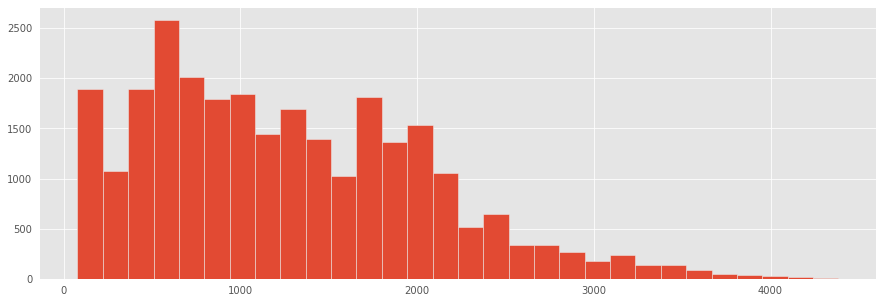

In [375]:
# Distribution of the number of days since first review
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
df.time_since_first_review.hist(figsize=(15,5), bins=30);

In [376]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [377]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

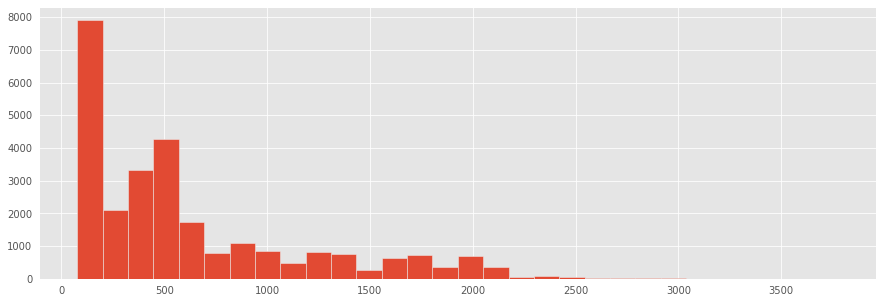

In [378]:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (pd.datetime(2021, 4, 24) - df.last_review).astype('timedelta64[D]')

# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [379]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [380]:
df.drop('last_review',axis=1, inplace=True)

### Review Scores Handling

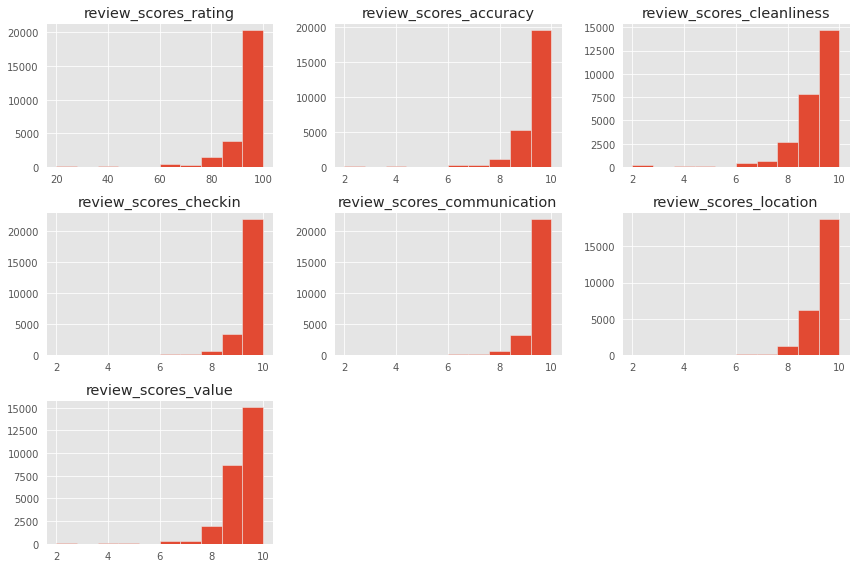

In [381]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [382]:
for col in variables_to_plot[1:]:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [383]:
variables_to_plot

['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [384]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

In [385]:
df.drop(['number_of_reviews_ltm', 'number_of_reviews_l30d'], axis=1, inplace=True)

In [386]:
df.head()
df.dtypes

host_since                     datetime64[ns]
host_response_rate                     object
host_is_superhost                     float64
host_listings_count                   float64
host_identity_verified                float64
neighbourhood                          object
neighbourhood_cleansed                 object
latitude                              float64
longitude                             float64
property_type                          object
room_type                              object
accommodates                            int64
bathrooms_text                        float64
bedrooms                              float64
beds                                  float64
price                                   int64
minimum_nights                          int64
maximum_nights                          int64
availability_90                         int64
number_of_reviews                       int64
first_review                   datetime64[ns]
review_scores_rating              

In [387]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum())/(df.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'],sort=False).sort_values('Total',ascending=False)
missing_data.head(10)

,Total,Percent
neighbourhood,8801,0.320783
tv,0,0.000000
review_scores_accuracy,0,0.000000
secure,0,0.000000
pets_allowed,0,0.000000
internet,0,0.000000
gym,0,0.000000
white_goods,0,0.000000
cooking_basics,0,0.000000
coffee_machine,0,0.000000


Now we can se that the data is quite clean except neighbourhood. While we have other variables called neightbourhood_cleaned, we can not simply drop it to aviod data missing because it can be use in the later EDA process.

In [388]:
#df.drop('neighbourhood',axis=1, inplace=True)

In [389]:
# Save cleaned dataset
#listings_cleaned = df.to_csv('listings_cleaned.csv', index=id, header=True)

In [390]:
df.shape

(27436, 42)

In [391]:
df

,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days_active,breakfast,tv,coffee_machine,cooking_basics,white_goods,gym,internet,pets_allowed,secure,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,2008-09-09,90-99%,0.0,6.0,1.0,"New York, United States",Midtown,40.75362,-73.98377,Apartment,Entire home/apt,2,1.0,1.0,1.0,100,30,1125,90,48,2009-11-21,80-94/100,9/10,9/10,10/10,10/10,10/10,9/10,0,0.35,4610.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4+ years,1+ year
3831,2008-12-07,90-99%,0.0,1.0,1.0,"Brooklyn, New York, United States",Clinton Hill,40.68514,-73.95976,Other,Entire home/apt,3,1.0,1.0,3.0,73,1,730,55,386,2014-09-30,80-94/100,10/10,9/10,9/10,10/10,10/10,10/10,0,4.99,4521.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4+ years,2-6 months
5178,2009-03-03,100%,0.0,1.0,0.0,"New York, United States",Midtown,40.76468,-73.98315,Apartment,Private room,2,1.0,1.0,1.0,79,2,14,86,474,2009-05-06,80-94/100,9/10,0-8/10,9/10,9/10,10/10,9/10,0,3.31,4435.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4+ years,6-12 months
5203,2009-02-05,unknown,0.0,1.0,1.0,"New York, United States",Upper West Side,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,1.0,75,2,14,0,118,2009-09-07,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,0,0.85,4461.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4+ years,1+ year
5803,2009-03-10,100%,1.0,3.0,1.0,"Brooklyn, New York, United States",South Slope,40.66829,-73.98779,House,Private room,2,1.5,1.0,0.0,83,4,90,90,182,2009-04-23,80-94/100,10/10,10/10,10/10,10/10,10/10,10/10,0,1.27,4428.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4+ years,6-12 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47922935,2017-06-03,100%,1.0,3.0,1.0,"Queens, New York, United States",Ozone Park,40.67319,-73.84068,Apartment,Entire home/apt,2,1.0,1.0,1.0,110,1,365,83,1,2021-02-05,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,1,1.00,1421.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0-6 months,2-6 months
47927919,2015-08-03,100%,0.0,4.0,1.0,"New York, United States",Upper West Side,40.79851,-73.96004,Apartment,Private room,1,1.0,4.0,5.0,46,5,60,74,1,2021-01-30,95-100/100,10/10,0-8/10,10/10,10/10,10/10,10/10,0,1.00,2091.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0-6 months,2-6 months
47941354,2016-11-15,100%,0.0,4.0,1.0,"Brooklyn, New York, United States",Williamsburg,40.70146,-73.94368,House,Private room,2,1.0,1.0,1.0,65,1,28,54,1,2021-02-04,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,1,1.00,1621.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0-6 months,2-6 months


# EDA--Exploratory Data Analysis
### 1.Most popular Airbnb locations in NYC

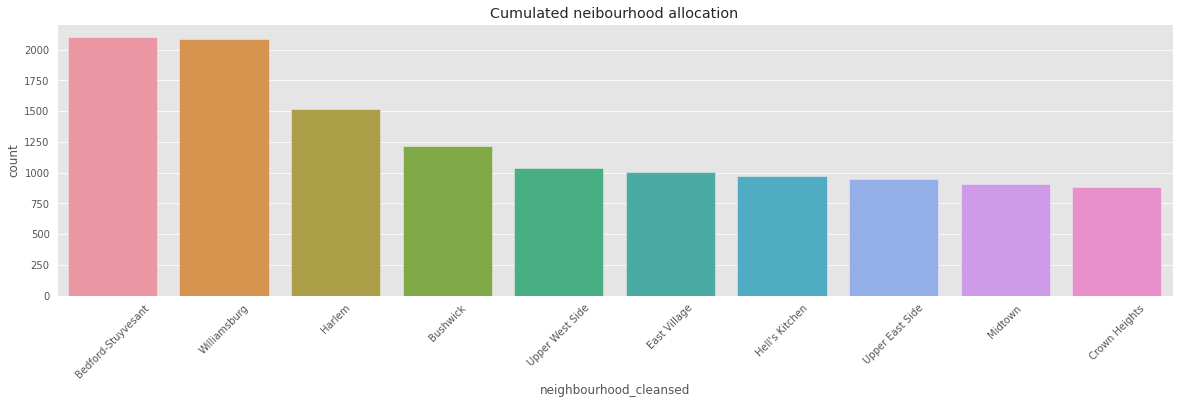

In [392]:
#TOP 10 neighbourhood with most listings
fig, ax = plt.subplots(1,1, figsize=(20,5)) # just formatting 
sns.countplot(df.neighbourhood_cleansed, ax=ax,order=pd.value_counts(df.neighbourhood_cleansed).iloc[:10].index)
plt.title('Cumulated neibourhood allocation')
plt.xticks(rotation=45);

### 2.AirBnB Type in NYC

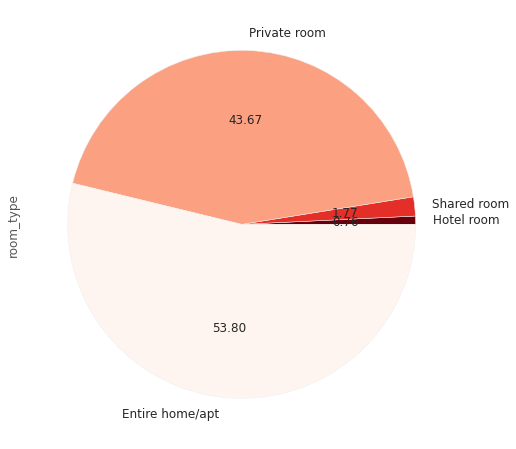

In [393]:
from collections import Counter
room_df = pd.DataFrame.from_dict(Counter(df.room_type), orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Reds_r', 
                 figsize=(8,8), 
                 fontsize = 12, autopct = '%.2f',
                 legend = False)

### 3.Difference in Price 

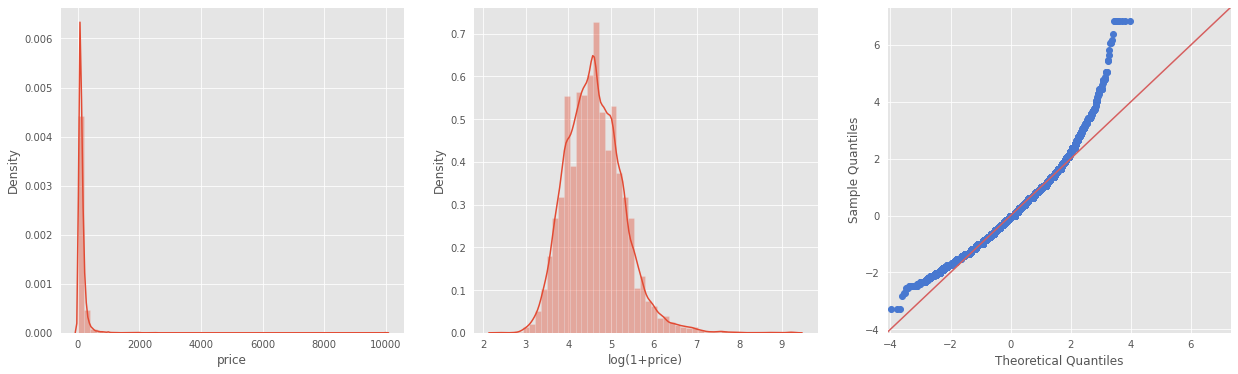

In [394]:
import statsmodels.api as sm
import scipy.stats as stats
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(df['price'], ax=axes[0])
sns.distplot(np.log1p(df['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(df['price']), stats.norm, fit=True, line='45', ax=axes[2]);

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

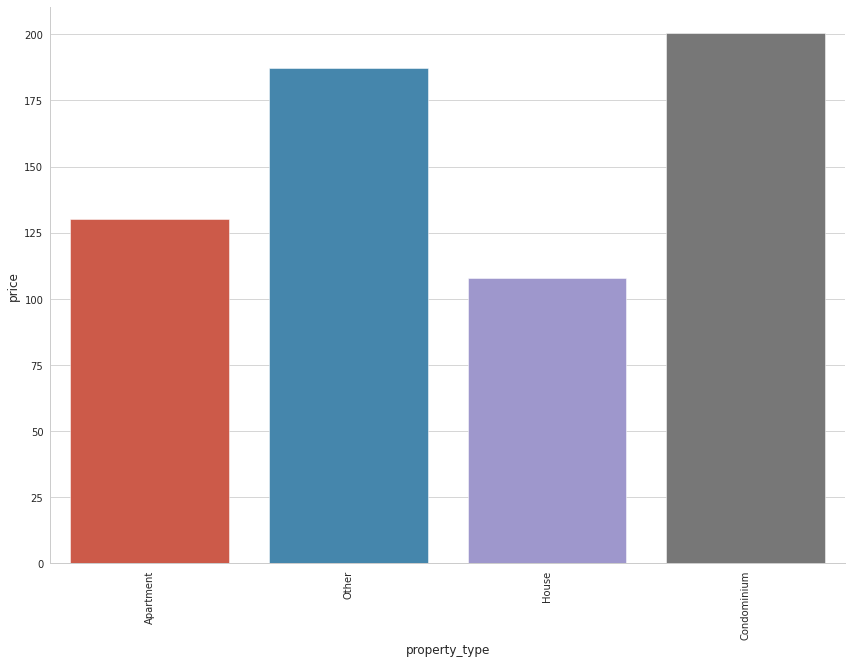

In [395]:
#average price for property type
sns.set_style("whitegrid")
sns.set_color_codes("muted")
sns.catplot(x="property_type", y="price", kind="bar",data=df,ci=None,height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)

### Neighbours

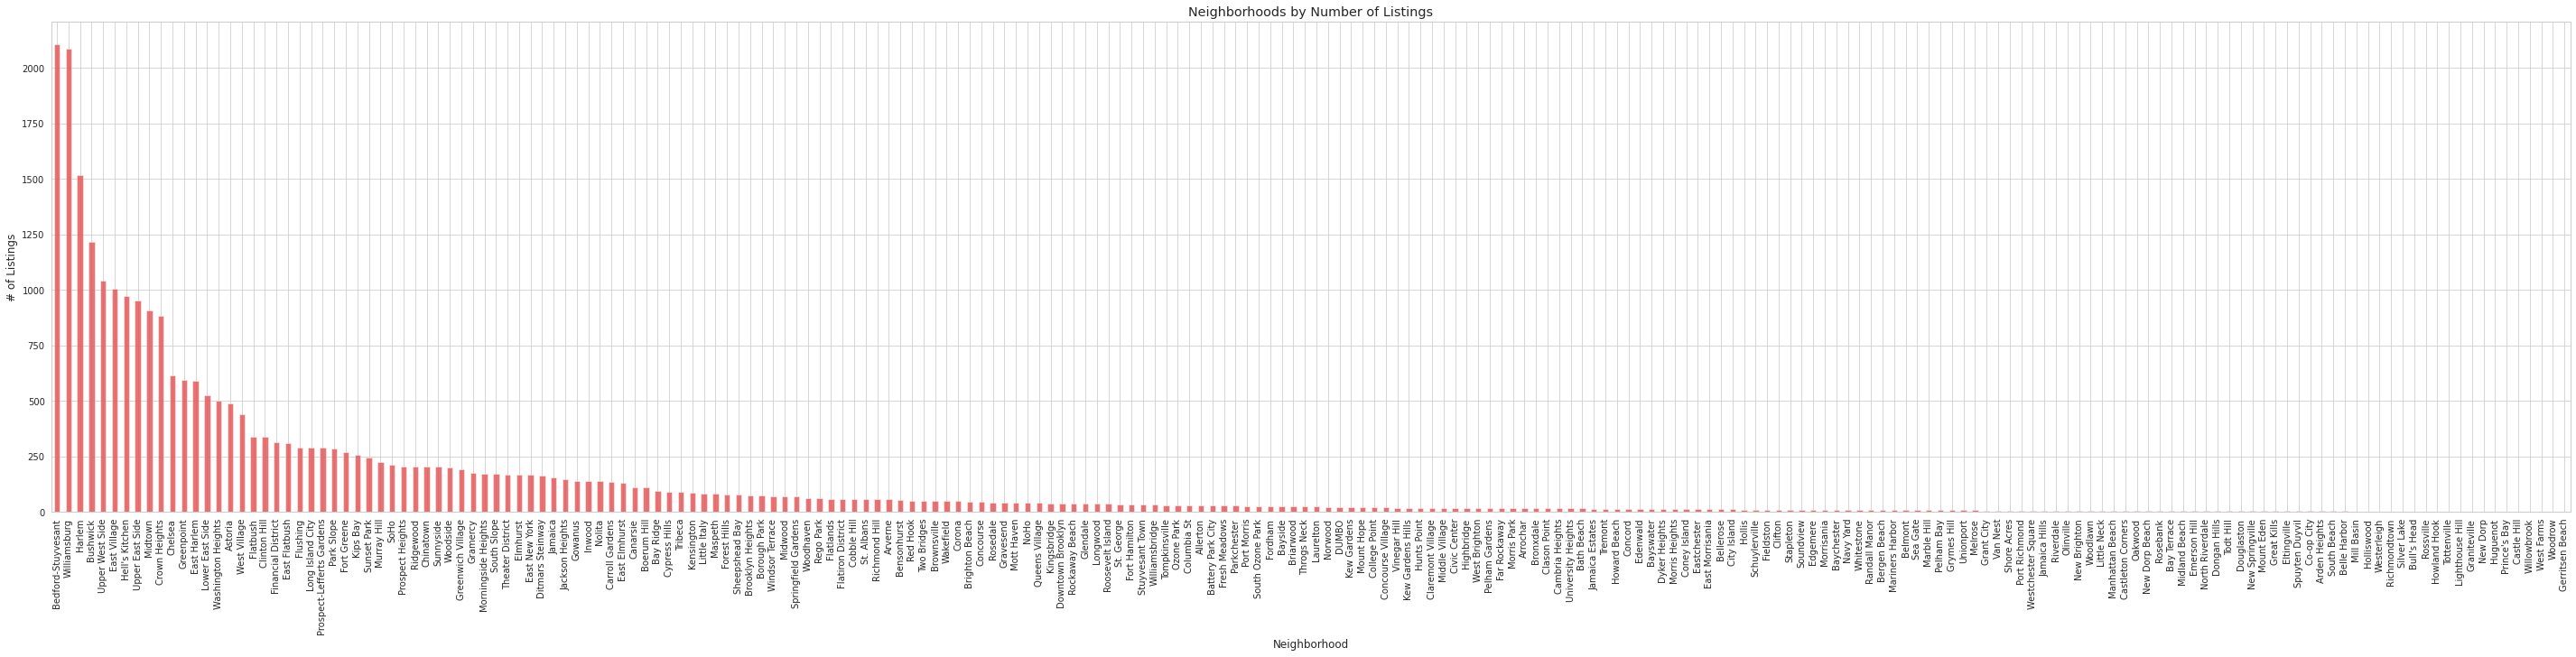

Number of Neighborhoods: 218


In [396]:
# Get number of listings in neighborhoods
count_per_neighborhood = df['neighbourhood_cleansed'].value_counts()

# Plot number of listings in each neighborhood
ax = count_per_neighborhood.plot(kind='bar', figsize = (50,10), color = '#E35A5C', alpha = 0.85)
ax.set_title("Neighborhoods by Number of Listings")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")
plt.show()

print("Number of Neighborhoods:", len(count_per_neighborhood))

There are too many small numbers of the neighbours that could be erased.

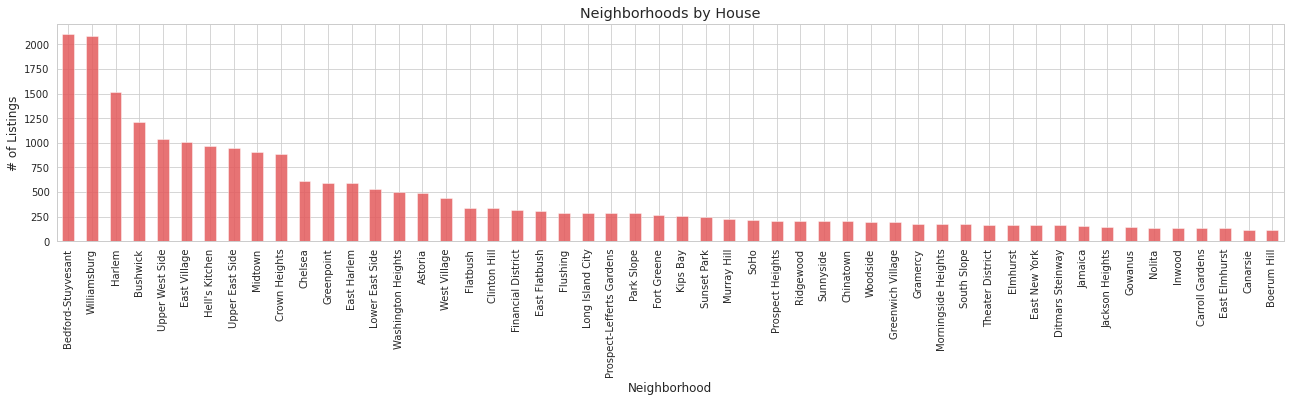

Number of entries removed:  3747


In [397]:
relevant_neighborhoods = count_per_neighborhood[count_per_neighborhood > 100].index
df_neighborhood_filtered = df[df['neighbourhood_cleansed'].isin(relevant_neighborhoods)]

# Plot new neighborhoods distribution
count_per_neighborhood = df_neighborhood_filtered['neighbourhood_cleansed'].value_counts()
ax = count_per_neighborhood.plot(kind='bar', figsize = (22,4), color = '#E35A5C', alpha = 0.85)
ax.set_title("Neighborhoods by House")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")

plt.show()

print('Number of entries removed: ', df.shape[0] - df_neighborhood_filtered.shape[0])

By flitering the neighborhood data, we have more than 20000+ data left on the new filtered dataframe.

In [398]:
df_new = df_neighborhood_filtered

In [399]:
import numpy as np
from sklearn import preprocessing

# Function to label encode categorical variables.
# Input: array (array of values)
# Output: array (array of encoded values)
def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Temporary dataframe
temp_data = df_new.copy()

# Delete additional entries with NaN values
temp_data = temp_data.dropna(axis=0)

# Encode categorical data
temp_data = temp_data.apply(encode_categorical)
# Compute matrix of correlation coefficients
corr_matrix = temp_data.corr()

corr_matrix

,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days_active,breakfast,tv,coffee_machine,cooking_basics,white_goods,gym,internet,pets_allowed,secure,time_since_first_review,time_since_last_review
host_since,1.000000,-0.102807,-0.017206,0.056684,-0.120384,0.139855,-0.036510,0.072218,0.147816,0.072601,0.107192,0.019460,0.026212,-0.013110,0.032947,-0.067901,-0.115405,0.009887,0.126248,-0.138637,0.542131,-0.096593,-0.038284,-0.060082,-0.019092,-0.036446,-0.020160,-0.084173,0.220961,0.135681,-0.998820,0.010712,0.045565,0.029958,0.015765,-0.061685,0.057357,-0.017957,NaN,0.014589,-0.336750,0.156275
host_response_rate,-0.102807,1.000000,-0.252032,-0.086577,-0.021446,-0.019449,0.020716,0.007654,-0.062798,-0.150098,0.090653,-0.137174,-0.083594,-0.123601,-0.146883,-0.017101,0.346427,0.073456,-0.354942,-0.183815,-0.163471,0.009194,0.023663,-0.007307,0.037132,0.037567,0.030062,0.000033,-0.027338,-0.229709,0.104760,0.008202,-0.092802,-0.258228,-0.255570,-0.050606,-0.004512,-0.024214,NaN,-0.039586,0.093493,-0.437944
host_is_superhost,-0.017206,-0.252032,1.000000,-0.037659,0.002465,-0.031093,-0.038642,-0.024837,0.049857,0.097425,-0.033378,0.064703,-0.005119,0.049780,0.082114,0.023016,-0.199253,-0.119106,0.130069,0.312346,-0.015141,0.221355,-0.094282,0.001645,-0.099260,-0.091755,-0.025335,-0.030381,-0.005808,0.272449,0.018612,0.002508,0.066971,0.299880,0.262015,0.055527,-0.039738,0.041171,NaN,0.007042,0.000309,0.214989
host_listings_count,0.056684,-0.086577,-0.037659,1.000000,0.038424,0.068097,0.028542,0.033728,-0.039127,0.041402,-0.034984,-0.022045,-0.008095,-0.026345,-0.018960,0.083479,0.030045,0.049237,0.007620,-0.049258,0.071059,-0.020463,-0.028983,-0.035495,-0.022083,-0.040579,-0.024433,-0.056808,0.083021,-0.039983,-0.054144,-0.025472,0.035409,-0.001044,-0.038694,0.048200,0.162461,0.004517,NaN,0.001430,-0.026138,0.030045
host_identity_verified,-0.120384,-0.021446,0.002465,0.038424,1.000000,0.004357,0.018664,0.011335,-0.039167,-0.014326,-0.005745,0.008870,0.027772,0.000713,0.000781,0.008111,0.000457,0.037977,-0.026545,0.006207,-0.056361,-0.013586,-0.013919,-0.001262,-0.017336,-0.023057,-0.011550,-0.003908,-0.026660,-0.003894,0.120024,-0.020684,-0.006532,0.011752,0.029911,0.026031,0.018998,-0.001436,NaN,0.016128,0.057897,0.014706
neighbourhood,0.139855,-0.019449,-0.031093,0.068097,0.004357,1.000000,0.244936,0.721131,-0.101875,-0.054615,-0.005260,-0.050135,-0.075721,-0.091638,-0.045960,0.096630,0.020875,0.055727,0.085318,-0.029844,0.055629,-0.066368,0.012133,0.001048,0.034214,0.008928,-0.064301,0.000262,0.062687,0.009096,-0.139294,-0.029783,0.065919,-0.045377,-0.033134,-0.011311,0.050809,-0.014862,NaN,0.006380,-0.030637,0.003137
neighbourhood_cleansed,-0.036510,0.020716,-0.038642,0.028542,0.018664,0.244936,1.000000,0.307472,-0.205287,-0.101886,-0.066319,-0.026396,-0.059395,-0.028692,-0.037227,0.127764,0.058634,0.063714,-0.042506,-0.073462,-0.032141,0.013063,-0.008034,0.005479,0.006504,-0.012606,-0.112532,-0.005177,-0.027603,-0.078567,0.035774,-0.020666,0.036301,-0.062717,-0.064744,0.055006,0.048496,0.004909,NaN,-0.001628,0.026715,-0.036048
latitude,0.072218,0.007654,-0.024837,0.033728,0.011335,0.721131,0.307472,1.000000,-0.006265,-0.134616,0.037289,-0.059308,-0.066273,-0.089520,-0.050100,0.028655,0.044420,0.047633,0.058556,-0.033307,0.011601,-0.034015,0.011418,0.010961,0.026337,0.000725,-0.038958,-0.001694,0.042614,-0.032040,-0.071692,-0.031129,0.043471,-0.035791,-0.032766,0.050176,0.026516,-0.007756,NaN,0.000808,-0.005907,-0.035408
longitude,0.147816,-0.062798,0.049857,-0.039127,-0.039167,-0.101875

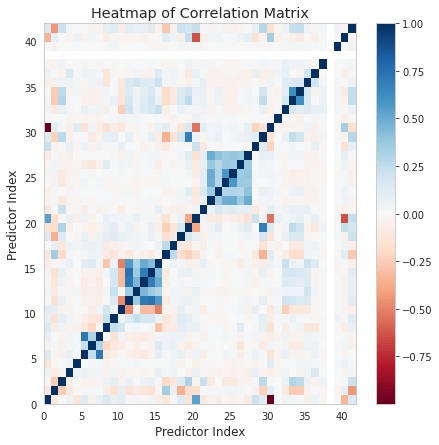

In [400]:
# Display heat map 
plt.figure(figsize=(7, 7))
plt.pcolor(corr_matrix, cmap='RdBu')
plt.xlabel('Predictor Index')
plt.ylabel('Predictor Index')
plt.title('Heatmap of Correlation Matrix')
plt.colorbar()

plt.show()

Base on the heatmap above, the bedrooms and beds are highly correlated so we can drop beds column. What's more, there are not any room saying pets allowed, therefore we can drop this column either. 

In [401]:
df_new.drop(['beds','pets_allowed'],axis=1, inplace=True)

In [402]:
df_new.describe()

,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms_text,bedrooms,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,reviews_per_month,host_days_active,breakfast,tv,coffee_machine,cooking_basics,white_goods,gym,internet,secure
count,23689.000000,23689.000000,23689.00000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,2.368900e+04,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000,23689.000000
mean,0.226054,10.363249,0.81637,40.731704,-73.954545,2.829541,1.146883,1.270041,136.519144,22.089662,9.303255e+04,35.551944,30.188991,0.282198,0.823700,2157.277977,0.069610,0.705264,0.400566,0.464688,0.481616,0.089240,0.982861,0.001857
std,0.418284,85.330724,0.38719,0.048614,0.035411,1.791049,0.439768,0.652766,246.957747,24.608426,1.395384e+07,39.556764,53.404733,0.450079,1.297059,934.457903,0.254495,0.455934,0.490023,0.498762,0.499672,0.285095,0.129791,0.043058
min,0.000000,0.000000,0.00000,40.628710,-74.023400,1.000000,0.000000,1.000000,10.000000,1.000000,1.000000e+00,0.000000,1.000000,0.000000,0.010000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.00000,40.691730,-73.982160,2.000000,1.000000,1.000000,65.000000,3.000000,6.200000e+01,0.000000,2.000000,0.000000,0.100000,1505.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,1.00000,40.726410,-73.955560,2.000000,1.000000,1.000000,99.000000,30.000000,1.125000e+03,5.000000,8.000000,0.000000,0.330000,2201.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,2.000000,1.00000,40.763230,-73.938810,4.000000,1.000000,1.000000,150.000000,30.000000,1.125000e+03,85.000000,32.000000,1.000000,1.040000,2840.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,2739.000000,1.00000,40.872790,-73.761290,16.000000,8.000000,21.000000,10000.000000,1250.000000,2.147484e+09,90.000000,753.000000,1.000000,40.310000,4628.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Features importance**

**Correlation and redundancy**

In [403]:
def find_high_correlated_features(frame):
    new_corr = frame.corr()
    new_corr.loc[:,:] = np.tril(new_corr, k=-1) 
    new_corr = new_corr.stack()
    print(new_corr[(new_corr > 0.70) | (new_corr < -0.70)])
    
predictor = list(set(df_new.columns.values))
find_high_correlated_features(df_new[predictor])   

accommodates  bedrooms    0.707629
dtype: float64


In [404]:
not_predictor =['accommodates']

**One-hot encoding**

In [405]:
df_new.head(5)

,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days_active,breakfast,tv,coffee_machine,cooking_basics,white_goods,gym,internet,secure,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,2008-09-09,90-99%,0.0,6.0,1.0,"New York, United States",Midtown,40.75362,-73.98377,Apartment,Entire home/apt,2,1.0,1.0,100,30,1125,90,48,2009-11-21,80-94/100,9/10,9/10,10/10,10/10,10/10,9/10,0,0.35,4610.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4+ years,1+ year
3831,2008-12-07,90-99%,0.0,1.0,1.0,"Brooklyn, New York, United States",Clinton Hill,40.68514,-73.95976,Other,Entire home/apt,3,1.0,1.0,73,1,730,55,386,2014-09-30,80-94/100,10/10,9/10,9/10,10/10,10/10,10/10,0,4.99,4521.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4+ years,2-6 months
5178,2009-03-03,100%,0.0,1.0,0.0,"New York, United States",Midtown,40.76468,-73.98315,Apartment,Private room,2,1.0,1.0,79,2,14,86,474,2009-05-06,80-94/100,9/10,0-8/10,9/10,9/10,10/10,9/10,0,3.31,4435.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4+ years,6-12 months
5203,2009-02-05,unknown,0.0,1.0,1.0,"New York, United States",Upper West Side,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,75,2,14,0,118,2009-09-07,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,0,0.85,4461.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4+ years,1+ year
5803,2009-03-10,100%,1.0,3.0,1.0,"Brooklyn, New York, United States",South Slope,40.66829,-73.98779,House,Private room,2,1.5,1.0,83,4,90,90,182,2009-04-23,80-94/100,10/10,10/10,10/10,10/10,10/10,10/10,0,1.27,4428.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4+ years,6-12 months


In [406]:
not_predictor += ['host_since','neighbourhood','latitude','longitude','first_review']

**Standardising and normalising**

In [407]:
numerical_columns = ['availability_90', 'bathrooms_text',
                      'host_days_active', 'host_listings_count', 'maximum_nights', 
                     'minimum_nights','number_of_reviews', 'reviews_per_month','price']

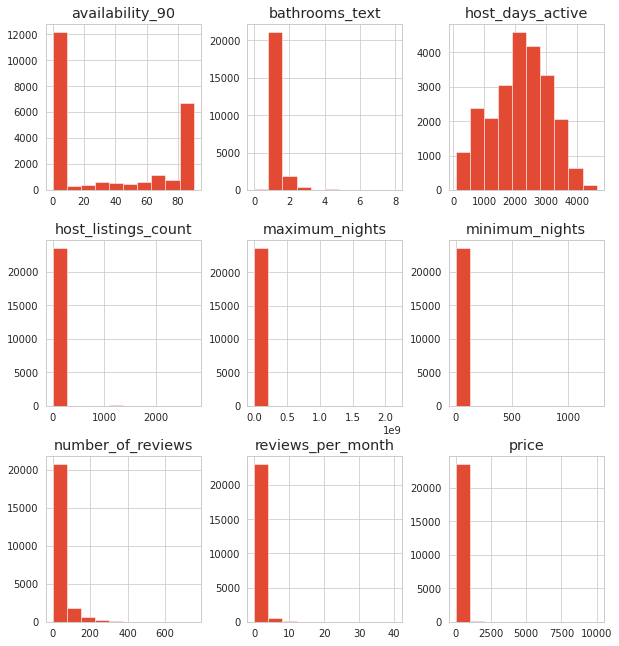

In [408]:
df_new[numerical_columns].hist(figsize=(10,11));

In [409]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns 
                     if i not in ['availability_90', 'host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    df_new[col] = df_new[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df_new[col] = np.log(df_new[col])

In [410]:
#dorp the coulumns not in the predictors
df_clean = df_new.drop(columns=['host_since','neighbourhood','latitude','longitude','first_review','accommodates'],axis=1)

In [411]:
all_columns = df_new.columns
df_clean

,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,bedrooms,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days_active,breakfast,tv,coffee_machine,cooking_basics,white_goods,gym,internet,secure,time_since_first_review,time_since_last_review
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,90-99%,0.0,1.791759,1.0,Midtown,Apartment,Entire home/apt,0.000000,1.0,4.605170,3.401197,7.025538,90,3.871201,80-94/100,9/10,9/10,10/10,10/10,10/10,9/10,0,-1.049822,4610.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4+ years,1+ year
3831,90-99%,0.0,0.000000,1.0,Clinton Hill,Other,Entire home/apt,0.000000,1.0,4.290459,0.000000,6.593045,55,5.955837,80-94/100,10/10,9/10,9/10,10/10,10/10,10/10,0,1.607436,4521.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4+ years,2-6 months
5178,100%,0.0,0.000000,0.0,Midtown,Apartment,Private room,0.000000,1.0,4.369448,0.693147,2.639057,86,6.161207,80-94/100,9/10,0-8/10,9/10,9/10,10/10,9/10,0,1.196948,4435.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4+ years,6-12 months
5203,unknown,0.0,0.000000,1.0,Upper West Side,Apartment,Private room,0.000000,1.0,4.317488,0.693147,2.639057,0,4.770685,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,0,-0.162519,4461.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4+ years,1+ year
5803,100%,1.0,1.098612,1.0,South Slope,House,Private room,0.405465,1.0,4.418841,1.386294,4.499810,90,5.204007,80-94/100,10/10,10/10,10/10,10/10,10/10,10/10,0,0.239017,4428.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,4+ years,6-12 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47920057,100%,0.0,-4.605170,1.0,Chelsea,Apartment,Private room,0.000000,1.0,4.465908,0.000000,3.332205,81,0.000000,0-79/100,10/10,0-8/10,10/10,10/10,10/10,0-8/10,1,0.000000,108.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0-6 months,2-6 months
47927919,100%,0.0,1.386294,1.0,Upper West Side,Apartment,Private room,0.000000,4.0,3.828641,1.609438,4.094345,74,0.000000,95-100/100,10/10,0-8/10,10/10,10/10,10/10,10/10,0,0.000000,2091.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0-6 months,2-6 months
47941354,100%,0.0,1.386294,1.0,Williamsburg,House,Private room,0.000000,1.0,4.174387,0.000000,3.332205,54,0.000000,95-100/100,10/10,10/10,10/10,10/10,10/10,10/10,1,0.000000,1621.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0-6 months,2-6 months


In [412]:

df_clean = pd.get_dummies(df_clean, columns=['host_response_rate', 'neighbourhood_cleansed','property_type','room_type',
                                           'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness',
                                           'review_scores_checkin','review_scores_communication','review_scores_location',
                                           'review_scores_value','time_since_first_review','time_since_last_review'], drop_first=True)

In [413]:
df_clean

,host_is_superhost,host_listings_count,host_identity_verified,bathrooms_text,bedrooms,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,reviews_per_month,host_days_active,breakfast,tv,coffee_machine,cooking_basics,white_goods,gym,internet,secure,host_response_rate_100%,host_response_rate_50-89%,host_response_rate_90-99%,host_response_rate_unknown,neighbourhood_cleansed_Bedford-Stuyvesant,neighbourhood_cleansed_Boerum Hill,neighbourhood_cleansed_Bushwick,neighbourhood_cleansed_Canarsie,neighbourhood_cleansed_Carroll Gardens,neighbourhood_cleansed_Chelsea,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Clinton Hill,neighbourhood_cleansed_Crown Heights,neighbourhood_cleansed_Ditmars Steinway,neighbourhood_cleansed_East Elmhurst,neighbourhood_cleansed_East Flatbush,...,neighbourhood_cleansed_Washington Heights,neighbourhood_cleansed_West Village,neighbourhood_cleansed_Williamsburg,neighbourhood_cleansed_Woodside,property_type_Condominium,property_type_House,property_type_Other,room_type_Hotel room,room_type_Private room,room_type_Shared room,review_scores_rating_80-94/100,review_scores_rating_95-100/100,review_scores_rating_nan,review_scores_accuracy_10/10,review_scores_accuracy_9/10,review_scores_accuracy_nan,review_scores_cleanliness_10/10,review_scores_cleanliness_9/10,review_scores_cleanliness_nan,review_scores_checkin_10/10,review_scores_checkin_9/10,review_scores_checkin_nan,review_scores_communication_10/10,review_scores_communication_9/10,review_scores_communication_nan,review_scores_location_10/10,review_scores_location_9/10,review_scores_location_nan,review_scores_value_10/10,review_scores_value_9/10,review_scores_value_nan,time_since_first_review_1-2 years,time_since_first_review_2-3 years,time_since_first_review_4+ years,time_since_first_review_6-12 months,time_since_last_review_2-6 months,time_since_last_review_6-12 months
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2595,0.0,1.791759,1.0,0.000000,1.0,4.605170,3.401197,7.025538,90,3.871201,0,-1.049822,4610.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3831,0.0,0.000000,1.0,0.000000,1.0,4.290459,0.000000,6.593045,55,5.955837,0,1.607436,4521.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0
5178,0.0,0.000000,0.0,0.000000,1.0,4.369448,0.693147,2.639057,86,6.161207,0,1.196948,4435.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
5203,0.0,0.000000,1.0,0.000000,1.0,4.317488,0.693147,2.639057,0,4.770685,0,-0.162519,4461.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
5803,1.0,1.098612,1.0,0.405465,1.0,4.418841,1.386294,4.499810,90,5.204007,0,0.239017,4428.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47920057,0.0,-4.605170,1.0,0.000000,1.0,4.465908,0.000000,3.332205,81,0.000000,1,0.000000,108.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
47927919,0.0,1.386294,1.0,0.000000,4.0,3.828641,1.609438,4.094345,74,0.000000,0,0.000000,2091.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
47941354,0.0,1.386294,1.0,0.000000,1.0,4.174387,0.000000,3.332

# Data split

In [415]:
X, Y = df_clean[df_clean.columns.difference(['price'])], df_clean['price']


In [416]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import FunctionTransformer 
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

from sklearn.svm import SVC 
from xgboost.sklearn import XGBClassifier 
import itertools
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from textblob import Word
from sklearn.ensemble import VotingClassifier 

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

In [417]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

import math
from scipy.special import gamma

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from IPython.display import display

import random

In [418]:
np.random.seed(9999)

In [422]:
# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [424]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123) 

In [430]:
import time
# modelling
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[15:56:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.1 minutes

Training MSE: 0.1726
Validation MSE: 0.1789

Training r2: 0.6203
Validation r2: 0.6172


In [434]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['importance'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('importance', ascending=False, inplace=True)
ft_weights_xgb_reg.head(10)

,importance
room_type_Private room,0.401074
bathrooms_text,0.047417
bedrooms,0.041993
room_type_Shared room,0.032468
tv,0.031862
review_scores_location_10/10,0.030536
time_since_last_review_2-6 months,0.019412
neighbourhood_cleansed_Bushwick,0.019099
gym,0.017983
white_goods,0.016482
